[*********************100%***********************]  1 of 1 completed


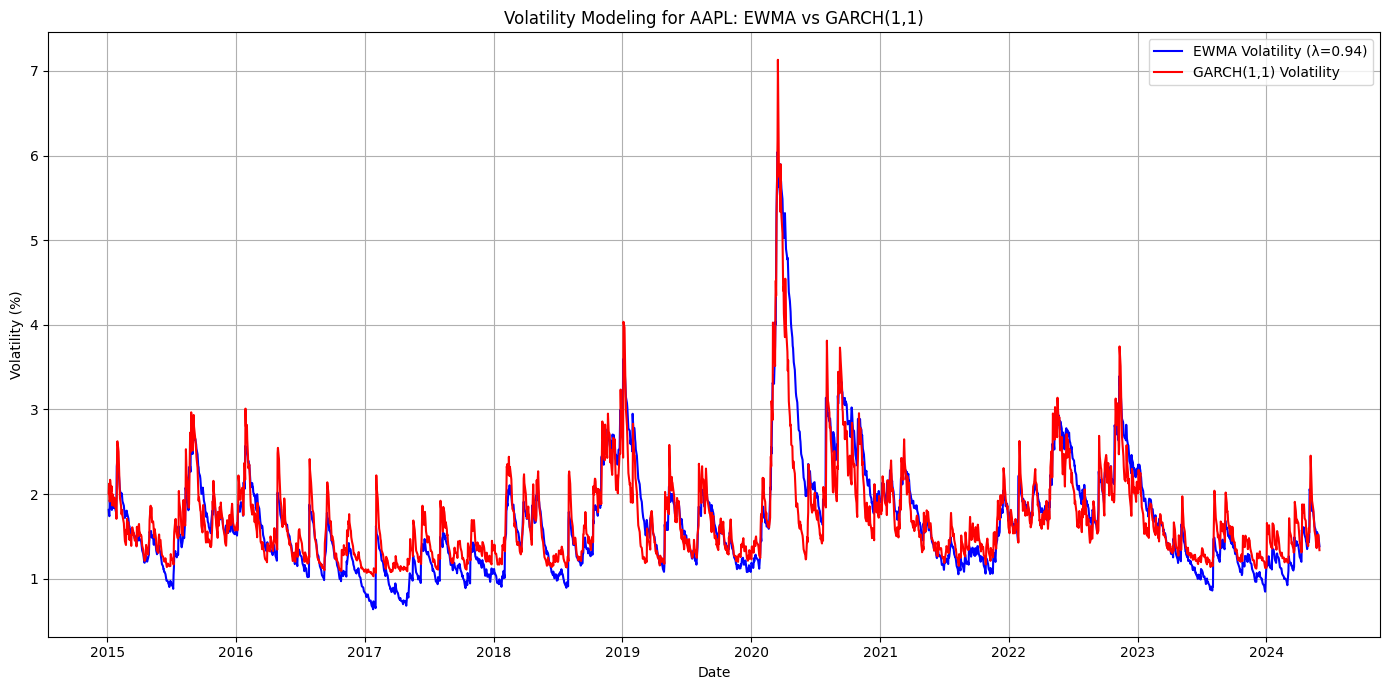

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4529.78
Distribution:                  Normal   AIC:                           9067.55
Method:            Maximum Likelihood   BIC:                           9090.63
                                        No. Observations:                 2368
Date:                Sat, Jun 07 2025   Df Residuals:                     2367
Time:                        13:52:21   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1690  3.341e-02      5.058  4.244e-07 [  0.103,  0.23

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

#  Parameters 
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2024-06-01'

#  Download data
data = yf.download(ticker, start=start_date, end=end_date)
prices = data['Close']
returns = prices.pct_change().dropna() * 100  # % returns for GARCH
returns=returns['AAPL']


# EWMA volatility 

# Parameters
lambda_ = 0.94

# Initialize
ewma_var = [returns.var()]
for r in returns[1:]:
    prev_var = ewma_var[-1]
    new_var = lambda_ * prev_var + (1 - lambda_) * r**2
    ewma_var.append(new_var)

ewma_vol = np.sqrt(ewma_var)

# Step 3: GARCH(1,1) volatility

# Fit GARCH model
am = arch_model(returns, vol='Garch', p=1, q=1)
res = am.fit(disp='off')
garch_vol = res.conditional_volatility

# Plot EWMA vs GARCH volatility

plt.figure(figsize=(14, 7))
plt.plot(returns.index, ewma_vol, label='EWMA Volatility (λ=0.94)', color='blue')
plt.plot(garch_vol.index, garch_vol, label='GARCH(1,1) Volatility', color='red')
plt.title(f'Volatility Modeling for {ticker}: EWMA vs GARCH(1,1)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print model summary 
print(res.summary())


In [ ]:
pip install arch

In [4]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288582,24.757336,23.848707,24.746228,212818400
2015-01-05,23.604332,24.137513,23.417720,24.057535,257142000
2015-01-06,23.606558,23.866483,23.244438,23.668762,263188400
2015-01-07,23.937574,24.037545,23.704307,23.815387,160423600
2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000
...,...,...,...,...,...
2024-05-24,189.095657,189.692870,187.164685,187.941069,36294600
2024-05-28,189.105621,192.101605,188.219765,190.618535,52280100


In [19]:
sum(returns['AAPL'])

245.42325943199947